### Dataset Loading

##### Importing pandas for reading the csv file

In [49]:
# importing pandas library
import pandas as pd

##### Loading dataset

In [60]:
# using pandas for importing the dataset and assigning it to a dataframe "df".
df = pd.read_csv('Dataset.csv')
df

,Age,Systolic BP,Diastolic BP,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,High
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,High
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,High
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,High


### (Exploratory Data Analysis) EDA

In [72]:
# Checking for missing values
df.isnull().sum()

Age                        0
Systolic BP                5
Diastolic BP               4
BS                         2
Body Temp                  0
BMI                       18
Previous Complications     2
Preexisting Diabetes       2
Gestational Diabetes       0
Mental Health              0
Heart Rate                 2
Risk Level                18
MappedTarget              18
dtype: int64

In [75]:
df.drop_duplicates(inplace=True)
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Age                       0
Systolic BP               0
Diastolic BP              0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
Risk Level                0
MappedTarget              0
dtype: int64

In [76]:
# checking the shape of the dataframe
df.shape

(1148, 13)

In [77]:
# getting statistical summary of the dataframe
df.describe()

,Age,Systolic BP,Diastolic BP,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,MappedTarget
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,27.829268,116.862369,77.307491,7.529591,98.390244,23.359495,0.179443,0.293554,0.119338,0.338850,75.840592,0.403310
std,12.755789,18.827632,14.369045,3.080500,1.081335,3.905924,0.383890,0.455588,0.324327,0.473525,7.245708,0.490776
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.975000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000
50%,25.500000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.000000,76.000000,0.000000
75%,32.000000,130.000000,90.000000,8.000000,98.000000,25.200000,0.000000,1.000000,0.000000,1.000000,80.000000,1.000000
max,325.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.000000,92.000000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1148 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1148 non-null   int64  
 1   Systolic BP             1148 non-null   float64
 2   Diastolic BP            1148 non-null   float64
 3   BS                      1148 non-null   float64
 4   Body Temp               1148 non-null   int64  
 5   BMI                     1148 non-null   float64
 6   Previous Complications  1148 non-null   float64
 7   Preexisting Diabetes    1148 non-null   float64
 8   Gestational Diabetes    1148 non-null   int64  
 9   Mental Health           1148 non-null   int64  
 10  Heart Rate              1148 non-null   float64
 11  Risk Level              1148 non-null   object 
 12  MappedTarget            1148 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 125.6+ KB


Risk Level
Low     685
High    463
Name: count, dtype: int64


(array([0, 1]), [Text(0, 0, 'Low'), Text(1, 0, 'High')])

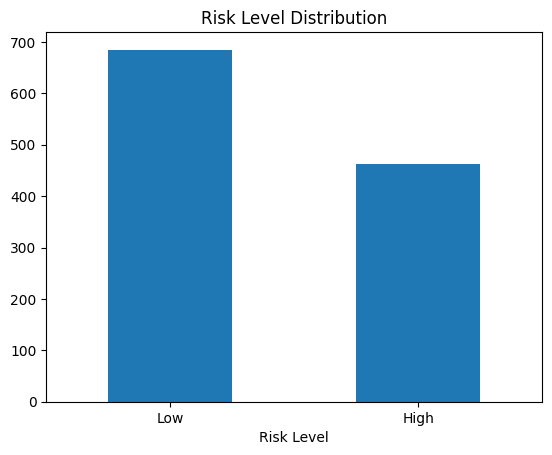

In [79]:
import matplotlib.pyplot as plt
class_value = df['Risk Level'].value_counts()
print(class_value)
class_value.plot(kind='bar', title='Risk Level Distribution')
plt.xticks(rotation=0)

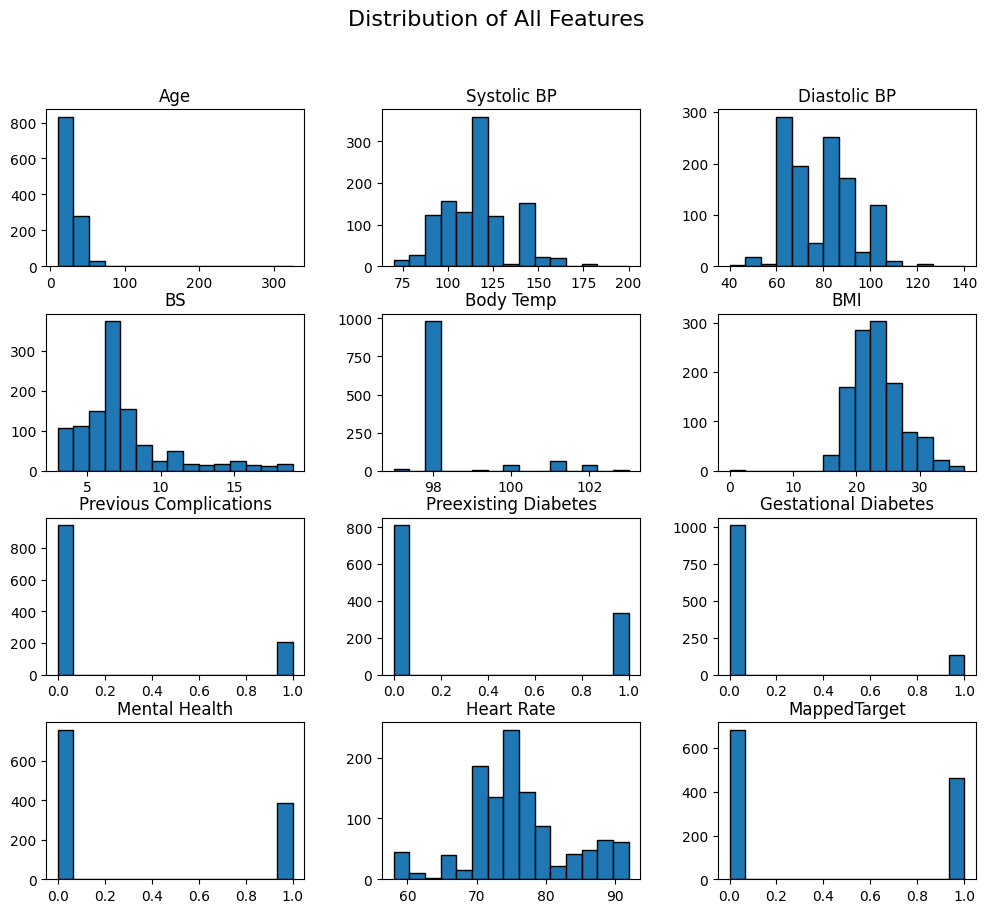

In [80]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=15, edgecolor='black', grid=False)

plt.suptitle('Distribution of All Features', fontsize=16)
plt.show()

### Pre-processing

##### target mapping to numbers

In [81]:
# mapping target variable to numerical values
mapping = {'Low': 0, 'High': 1}
df['MappedTarget'] = df['Risk Level'].map(mapping)
df

,Age,Systolic BP,Diastolic BP,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level,MappedTarget
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High,1
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low,0
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low,0
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low,0
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,High,1
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,High,1
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,High,1
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,High,1


##### Defining features and target

In [97]:
# defining feature and target variables.
X = df.drop(columns=['Previous Complications', 'Preexisting Diabetes', 'Gestational Diabetes', 'Mental Health', 'Risk Level', 'MappedTarget'])
y = df['MappedTarget']

##### Data Splitting into train and test data

In [98]:
# importing train_test_split from sklearn.model_selection for splitting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [100]:
# imporing LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression(max_iter=1000, C=20, class_weight='balanced')
LRModel.fit(X_train_scaled, y_train)
y_pred_lr = LRModel.predict(X_test_scaled)
print("Logistic Regression Model trained successfully.")

Logistic Regression Model trained successfully.


In [101]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
RFmodel.fit(X_train_scaled, y_train)
y_pred_rf = RFmodel.predict(X_test_scaled)
print("Random Forest Model trained successfully.")


Random Forest Model trained successfully.


In [102]:
from sklearn.svm import SVC
SVMModel = SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', probability=True, random_state=42)
SVMModel.fit(X_train_scaled, y_train)
y_pred_svm = SVMModel.predict(X_test_scaled)
print("Support Vector Classifier Model trained successfully.")

Support Vector Classifier Model trained successfully.


### Model Evaluation

##### Importing Libraries needed for evaluation

In [103]:
# importing accuracy_score and classification_report from sklearn.metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

##### Evaluation for Logistic Regression

In [104]:
lr_train_accuracy = accuracy_score(y_train, LRModel.predict(X_train_scaled))
print(f"Training Accuracy: {lr_train_accuracy:.2f}")
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Testing Accuracy: {lr_test_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.89
Testing Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       137
           1       0.85      0.87      0.86        93

    accuracy                           0.89       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.89      0.89      0.89       230



##### Evaluation for Random Forest Classifier

In [105]:
rf_train_accuracy = accuracy_score(y_train, RFmodel.predict(X_train_scaled))
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2f}")
rf_test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Testing Accuracy: {rf_test_accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 0.97
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       137
           1       0.98      0.96      0.97        93

    accuracy                           0.97       230
   macro avg       0.97      0.97      0.97       230
weighted avg       0.97      0.97      0.97       230



##### Evaluation for Support Vector Classifier

In [110]:
svc_train_accuracy = accuracy_score(y_train, SVMModel.predict(X_train_scaled))
print(f"SVM Training Accuracy: {svc_train_accuracy:.2f}")
svc_test_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Testing Accuracy: {svc_test_accuracy:.2f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Training Accuracy: 0.97
SVM Testing Accuracy: 0.95
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       137
           1       0.95      0.92      0.93        93

    accuracy                           0.95       230
   macro avg       0.95      0.94      0.95       230
weighted avg       0.95      0.95      0.95       230



##### Confusion Matrices for all models

Text(0.5, 1.0, 'SVM Confusion Matrix')

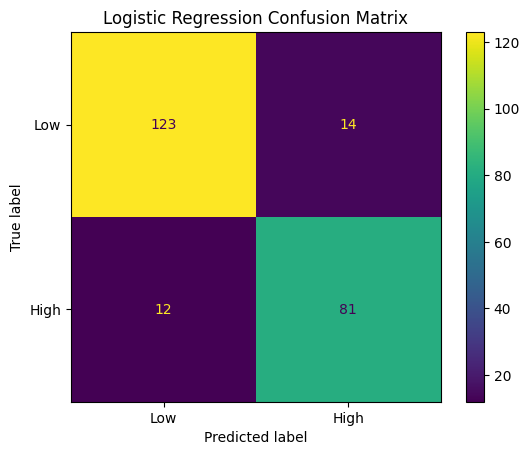

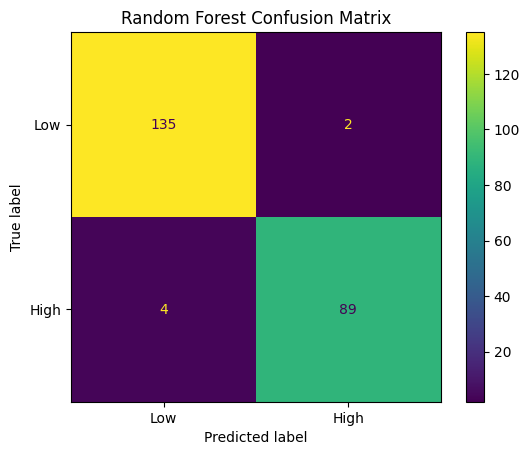

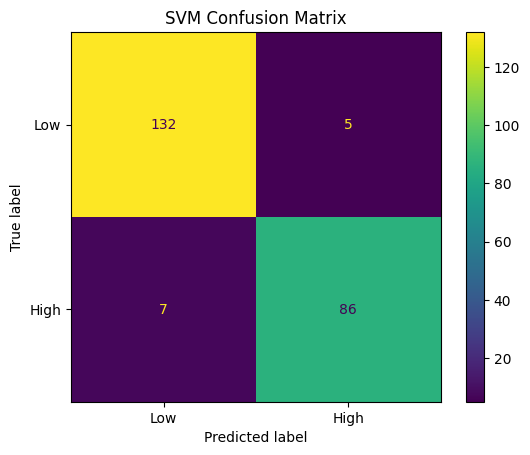

In [107]:
class_names = ['Low', 'High']

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=class_names)
plt.title('Logistic Regression Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=class_names)
plt.title('Random Forest Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=class_names)
plt.title('SVM Confusion Matrix')


### Prediction using the trained models